# Task 1: Text Preprocessing & Sentiment Analysis

**DESCRIPTION**:

- *selection a small corpus of text reviews ;*
- *preprocessing of data ;*
- *applying a sentiment analysis technique to determine the overall sentiment.*

**STEP 1: CORPUS**

**Import and setup**

In [25]:
# Import necessary libraries as seen in the tutorials and notebooks
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.display import display

# Download necessary NLTK data packages :
# tools for tokenization, stop words, POS tagging, and lemmatization
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('vader_lexicon', quiet=True)

print("✅ Setup Complete: Libraries imported and NLTK data downloaded.")

✅ Setup Complete: Libraries imported and NLTK data downloaded.


**Load data .csv from google drive**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

# raw data of film reviews
file_path = '/content/drive/My Drive/Colab Notebooks/imdb_tvshows.csv'

try:
    data_full = pd.read_csv(file_path)
    print("✅ File loaded successfully from Google Drive!")
except FileNotFoundError:
    print(f"❌ FileNotFoundError: Check that your file path is correct: '{file_path}'")
    exit()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ File loaded successfully from Google Drive!


**Prepare and clean data**

In [27]:
# Take a random sample of 300 reviews for the project to have a manageable size.
data = data_full.sample(n=300, random_state=42).reset_index(drop=True)

# Removing unnamed column if it exists.
if "Unnamed: 0" in data.columns:
    data = data.drop(columns=["Unnamed: 0"])

# Clean up column names for easier access (e.g., remove spaces, convert to lowercase)
data.columns = data.columns.str.lower().str.replace(' ', '_').str.replace(r'\(.*\)', '', regex=True)

print("Data loaded and cleaned. Column names are now:", data.columns.tolist())
display(data.head())

Data loaded and cleaned. Column names are now: ['rating_', 'review', 'show_id', 'review_id']


,rating_,review,show_id,review_id
0,6,I loved it at the beginning but if you start f...,tt5834204,rw6245102
1,10,"First of all, I was very doubtful when Henry f...",tt5180504,rw5336061
2,9,"Wow , I don't know what's been keeping me from...",tt4236770,rw7738488
3,9,I see many reviews here applauding the series ...,tt9288030,rw7836928
4,8,"BEST show EVER! Love BETH AND RIP, They are my...",tt4236770,rw8354947


**STEP 2: TEXT PROCCESSING PIPELINE**



**Text processing function definition: used in the next step**

In [28]:
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Helper function to convert NLTK POS tags to WordNet POS tags for lemmatization
def get_wordnet_pos(treebank_tag):
    """Converts treebank POS tags to WordNet POS tags."""
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        # Default to noun as per the tutorial
        return wordnet.NOUN

# Main function to process text
def preprocess_text(text):
    """Applies the full preprocessing pipeline to a single text string."""
    # Ensure input is a string
    if not isinstance(text, str):
        return ""

    # a. Normalization: convert to lowercase
    text = text.lower()

    # b. Noise, punctuation, and number removal
    text = re.sub(r'[^a-z\s]', '', text)

    # c. Tokenization: break text into words
    tokens = word_tokenize(text)

    # d. Stop word removal
    tokens = [word for word in tokens if word not in stop_words]

    # e. Lemmatization (with POS Tagging)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]

    return " ".join(lemmatized_tokens)

print("✅ Preprocessing functions defined.")


✅ Preprocessing functions defined.


**STEP 2, 3 & 4: SENTIMENT ANALYSIS IMPLEMENTATION AND VISUALIZATION**

**Applying the pipeline and generating results**

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


STEP 2: Applying preprocessing pipeline to the DataFrame...
✅ Preprocessing done.
--- Sample of Raw vs. Processed Reviews ---


,review,processed_review
0,I loved it at the beginning but if you start f...,love begin start feel like every step film nea...
1,"First of all, I was very doubtful when Henry f...",first doubtful henry first get role think real...
2,"Wow , I don't know what's been keeping me from...",wow dont know whats keep watch wow currently l...
3,I see many reviews here applauding the series ...,see many review applaud series compare book we...
4,"BEST show EVER! Love BETH AND RIP, They are my...",best show ever love beth rip favorites next ke...



 STEP 3: Applying sentiment analysis...
✅ Sentiment analysis complete.

--- STEP 3: Overall Corpus Sentiment ---
Average Sentiment Score (Compound): 0.6041

Proportion of Each Sentiment Category:
sentiment_label
Positive    83.33
Negative    15.33
Neutral      1.33

--- STEP 4: Visualizations ---

--- Part A - sentiment distribution visualization ---


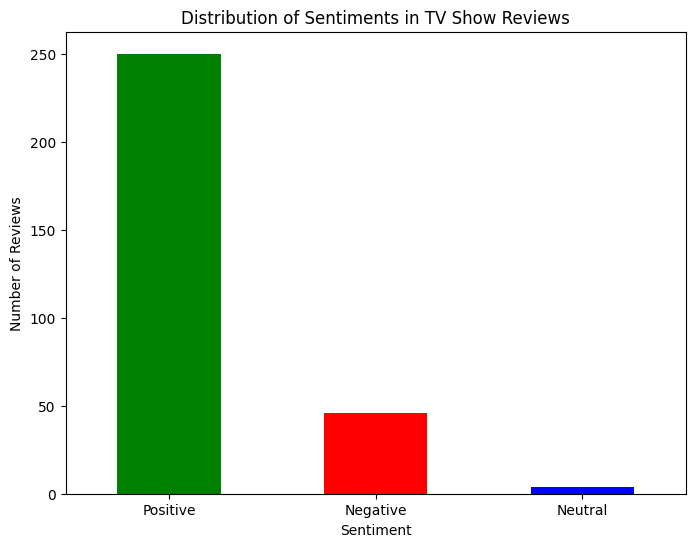


--- Part B - word cloud for positive and negative reviews ---


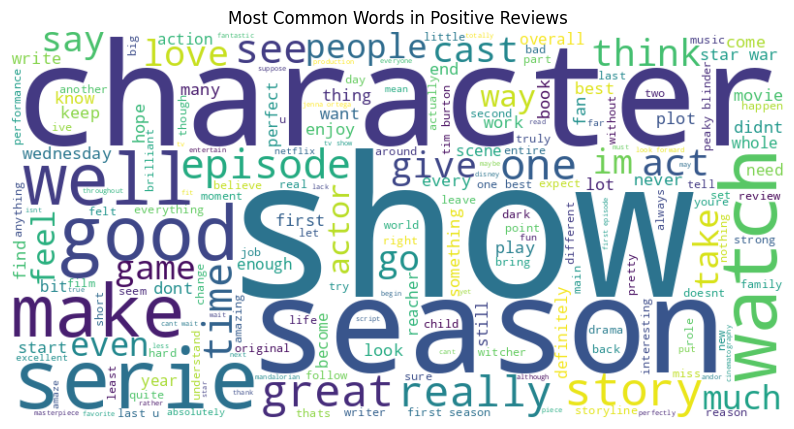

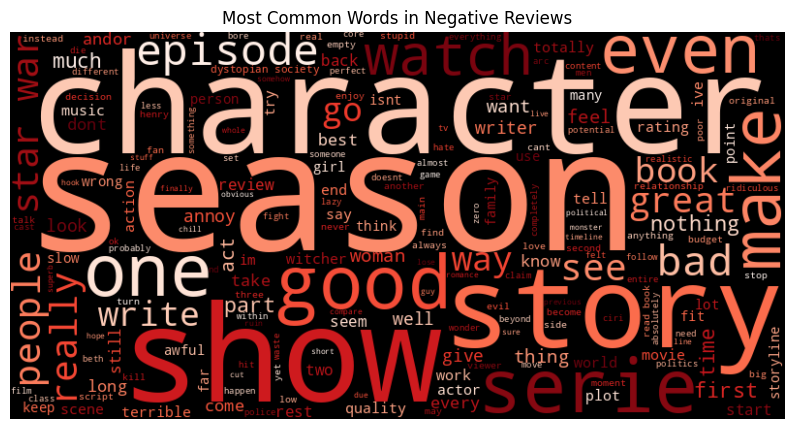


--- Part C - Highlighted Example Reviews ---

✅ STRONGEST POSITIVE (VADER Score: 1.00):
-> 'In short, I would recommend The Witcher to pretty much everyone, especially those into fantasy and action. It excels in its layered portrayal of its characters and the colorful and double-edged depictions of the relationships between them. The world of the series is vast and filled with lore. The action is a major strong point and the monsters we face throughout the series look amazing and are both interesting and terrifying.  The Witcher will most likely remind you a lot of A Game of Thrones, and while they do share some similarities, The Witcher is far from a derivative clone of the great hit series. The Witcher does also, as stated previously, have a great world, great characters, and great action. Something that makes The Witcher different is the great relationships. Especially between our two main characters, whose father and daughter relationship is great to watch and see develop.  The gr

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

# === STEP 2 - APPLY PREPROCESSING ===
print("STEP 2: Applying preprocessing pipeline to the DataFrame...")
data['processed_review'] = data['review'].apply(preprocess_text)
print("✅ Preprocessing done.")

print("--- Sample of Raw vs. Processed Reviews ---")
display(data[['review', 'processed_review']].head())

# === STEP 3 - SENTIMENT ANALYSIS IMPLEMENTATION ===
print("\n STEP 3: Applying sentiment analysis...")
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the original 'review' column
data['sentiment_scores'] = data['review'].apply(lambda r: analyzer.polarity_scores(str(r)))

# Extract the compound score, which is a useful single metric for sentiment
data['compound_score'] = data['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

# Function to classify sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the classification function to create a sentiment label for each review
data['sentiment_label'] = data['compound_score'].apply(classify_sentiment)
print("✅ Sentiment analysis complete.")

# === STEP 3 - CALCULATE AVERAGE SENTIMENT SCORE ===
# Calculate the overall average numerical sentiment score for the entire corpus
average_compound_score = data['compound_score'].mean()
# Calculate the proportion of each sentiment category as required
sentiment_proportions = data['sentiment_label'].value_counts(normalize=True) * 100

print(f"\n--- STEP 3: Overall Corpus Sentiment ---")
print(f"Average Sentiment Score (Compound): {average_compound_score:.4f}")
print("\nProportion of Each Sentiment Category:")
print(sentiment_proportions.round(2).to_string())

# === STEP 4 - ANALYSIS AND VISUALIZATION ===
print("\n--- STEP 4: Visualizations ---")
# Part A: Sentiment Distribution Visualization
print("\n--- Part A - sentiment distribution visualization ---")

sentiment_counts = data['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Sentiments in TV Show Reviews')
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.show()

# Part B: Word Clouds for Positive and Negative Reviews
print("\n--- Part B - word cloud for positive and negative reviews ---")
positive_text = " ".join(review for review in data[data['sentiment_label'] == 'Positive']['processed_review'])
negative_text = " ".join(review for review in data[data['sentiment_label'] == 'Negative']['processed_review'])

if positive_text:
    plt.figure(figsize=(10, 7))
    pos_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(positive_text)
    plt.imshow(pos_wordcloud, interpolation='bilinear')
    plt.title('Most Common Words in Positive Reviews')
    plt.axis('off')
    plt.show()

if negative_text:
    plt.figure(figsize=(10, 7))
    neg_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
    plt.imshow(neg_wordcloud, interpolation='bilinear')
    plt.title('Most Common Words in Negative Reviews')
    plt.axis('off')
    plt.show()

# Part C: Highlight Example Reviews
print("\n--- Part C - Highlighted Example Reviews ---")
strong_pos = data.loc[data['compound_score'].idxmax()]
print(f"\n✅ STRONGEST POSITIVE (VADER Score: {strong_pos['compound_score']:.2f}):")
print(f"-> '{strong_pos['review']}'")

strong_neg = data.loc[data['compound_score'].idxmin()]
print(f"\n❌ STRONGEST NEGATIVE (VADER Score: {strong_neg['compound_score']:.2f}):")
print(f"-> '{strong_neg['review']}'")

neutral_review = data[data['sentiment_label'] == 'Neutral'].head(1)
if not neutral_review.empty:
    neutral_review_details = neutral_review.iloc[0]
    print(f"\n➖ NEUTRAL (VADER Score: {neutral_review_details['compound_score']:.2f}):")
    print(f"-> '{neutral_review_details['review']}'")
else:
    print("\nNo neutral reviews were found in this sample.")